In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df = pd.read_csv('prepared.csv', index_col=0)

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,65-70
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.640331,never smoked,1,60-65
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,75-80
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,45-50
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,75-80


### Explore plan
- Look at distributions
- Split
- Using Train answer hyptheses

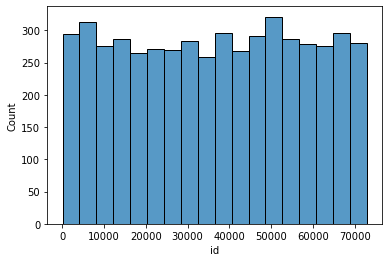

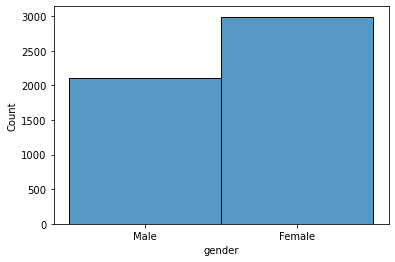

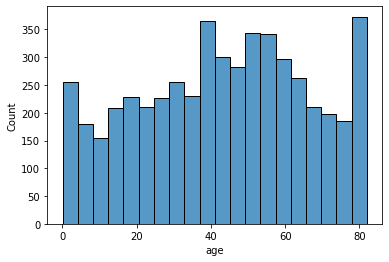

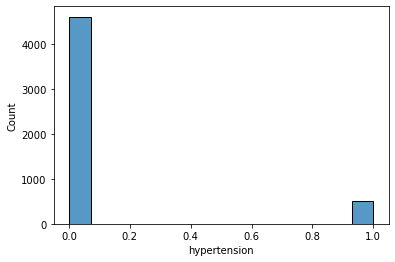

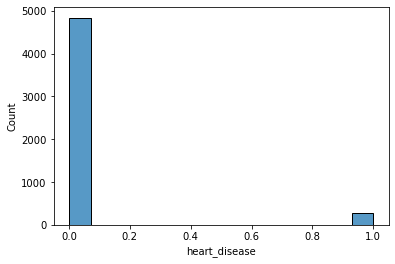

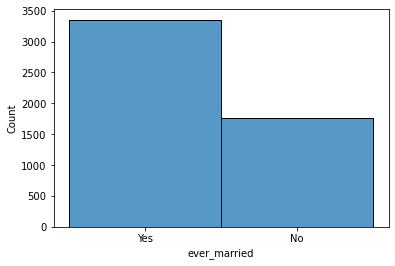

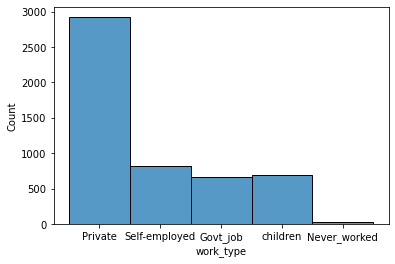

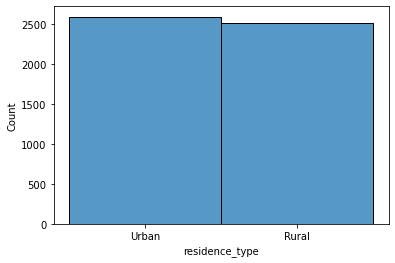

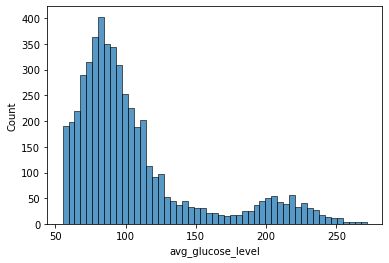

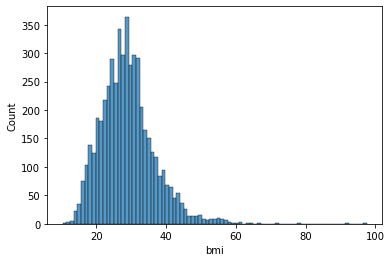

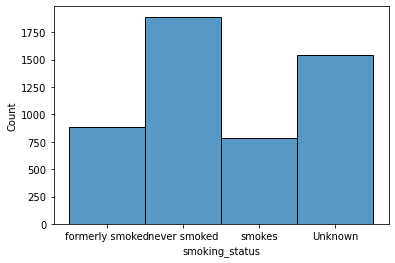

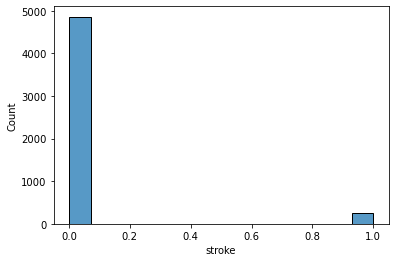

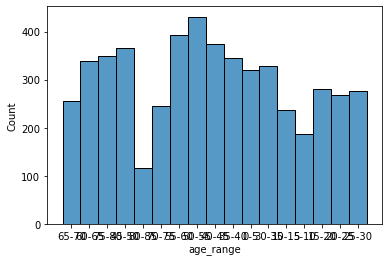

In [4]:
# creating the distribution plot for each column
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

- age is left skewed
- average glucose level is right skewed
- bmi is close to normally distributed

In [5]:
# split the dataset into train_validate and test
train_validate, test = train_test_split(df, test_size=.2, random_state=777)

In [6]:
# the second split of train and validate
train, validate = train_test_split(train_validate, test_size=.25, random_state=777)

In [7]:
# checking the shape of each dataset
train.shape, validate.shape, test.shape

((3065, 13), (1022, 13), (1022, 13))

Hypothesis 1:
- There is no relationship between average glucose level and bmi.
- There is relationship between average glucose level and bmi.

- Confidence interval is 95%

In [25]:
alpha = .05

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

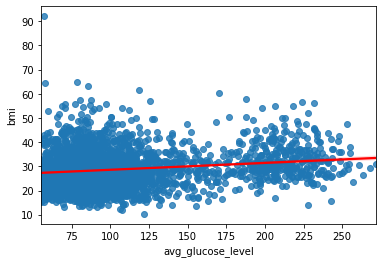

In [14]:
# creating a scatterplot to show the relationsip between avg glucose level and bmi
sns.regplot(data=train, x="avg_glucose_level", y="bmi",line_kws={'color': 'red'})

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

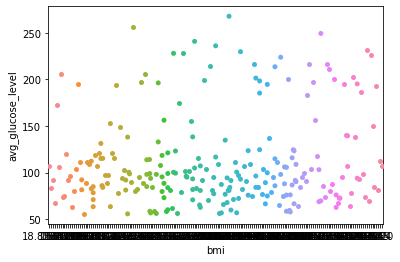

In [21]:
# creating an awesome swarmplot to show the relationship of avg glucose level and bmi
sns.swarmplot(x='bmi', y='avg_glucose_level', data=train.sample(250))

In [ ]:
QUESTIONS: HOW DO I FIX THE X AXIS

In [23]:
# here we conduct a pearson r test 
corr, p = stats.pearsonr(train.avg_glucose_level, train.bmi)
corr, p

(0.1715254388784596, 1.1422802552175544e-21)

In [28]:
# comparing the p-value to alpha
if p < alpha:
    print('There is a relationship between average glucose level and bmi.')
else:
    print('We can not say with 95% confidence that there is a realionship between average glucose level and bmi.')

There is a relationship between average glucose level and bmi.


Hypothesis 2:
-People over 65 years old are not more likely to have a stroke than people under 65.
-People over 65 years old are more likely to have a stroke than people under 65.

Hypothesis 3:
-People that currently smoke do not have a higher risk of stroke than people that don’t currently smoke.
-People that currently smoke have a higher risk of stroke than people that don’t currently smoke.

Hypothesis 4:
-Men are not more at risk for stroke than women.
-Men are more at risk for stroke than women.